# Mini-project 1: Deep Q-learning for Epidemic Mitigation

## Imports

In [1]:
"""Environment imports"""
from epidemic_env.agent import Agent
from epidemic_env.dynamics import ModelDynamics
from epidemic_env.env import Env

"""Pytorch and numpy imports"""
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

#@formatter:off
%matplotlib inline
#@formatter:on

## Question 1

In [2]:
dyn = ModelDynamics('config/switzerland.yaml')
env = Env(dyn,  # We pass the dynamical model to the environment
          action_space=None,  # Here one could pass an openai gym action space that can then be sampled
          observation_space=None,  # Here one could pass an openai gym obs space that can then be sampled
          )
obs, info = env.reset(seed=0)
action = {  # DO NOTHING
    'confinement': False,
    'isolation': False,
    'hospital': False,
    'vaccinate': False,
}

In [3]:
infos_list = []
for i in range(30):
    obs, reward, done, info = env.step(action)
    infos_list.append(info)

### 1

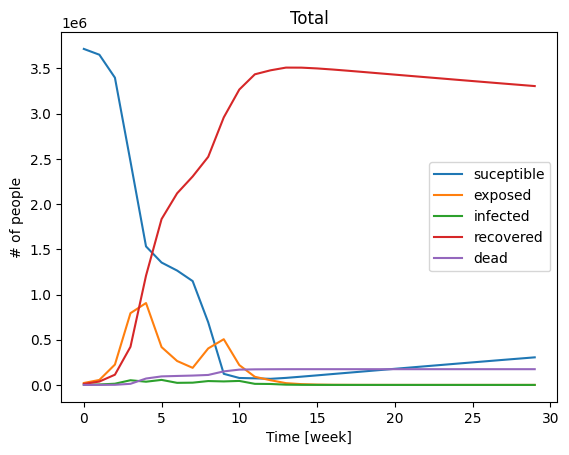

In [4]:
totals = [info.total for info in infos_list]
suceptibles = [total.suceptible for total in totals]
exposeds = [total.exposed for total in totals]
infected = [total.infected for total in totals]
recovereds = [total.recovered for total in totals]
deads = [total.dead for total in totals]

plt.plot(suceptibles, label='suceptible')
plt.plot(exposeds, label='exposed')
plt.plot(infected, label='infected')
plt.plot(recovereds, label='recovered')
plt.plot(deads, label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### 2

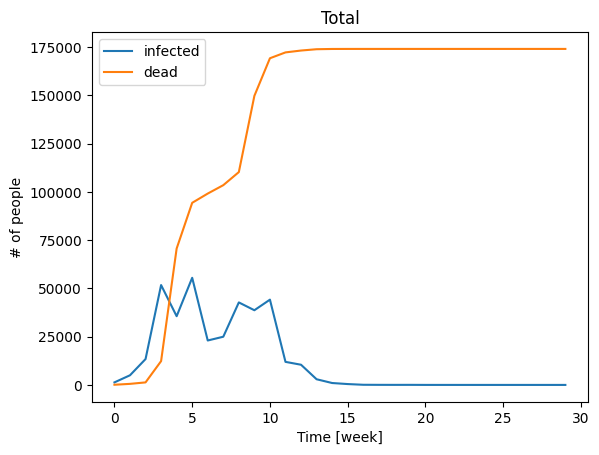

In [5]:
plt.plot(infected, label='infected')
plt.plot(deads, label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### 3

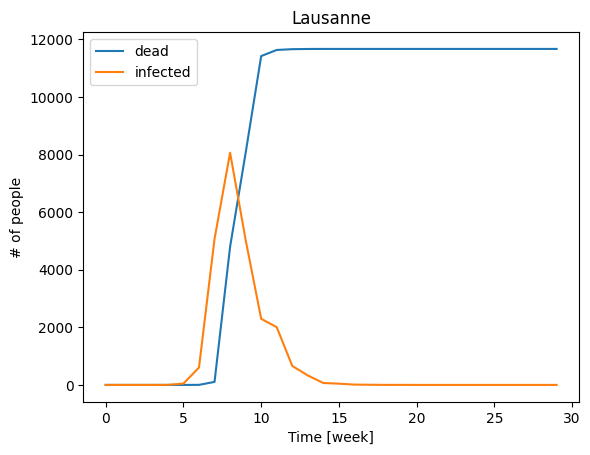

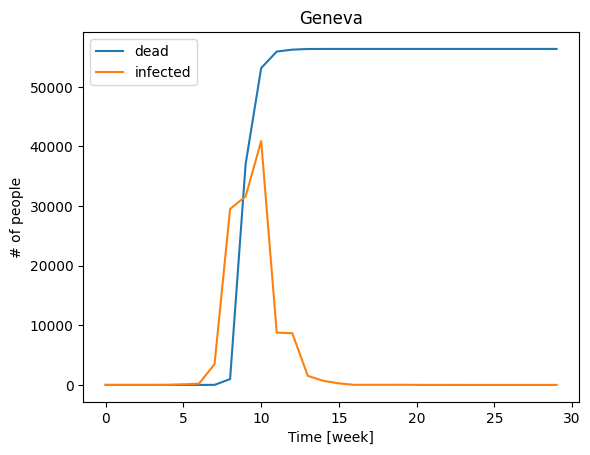

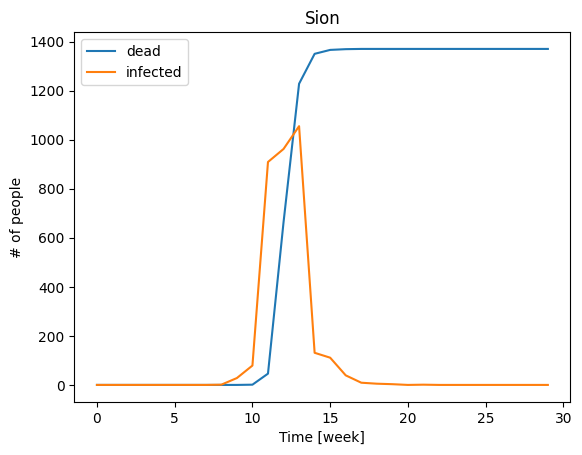

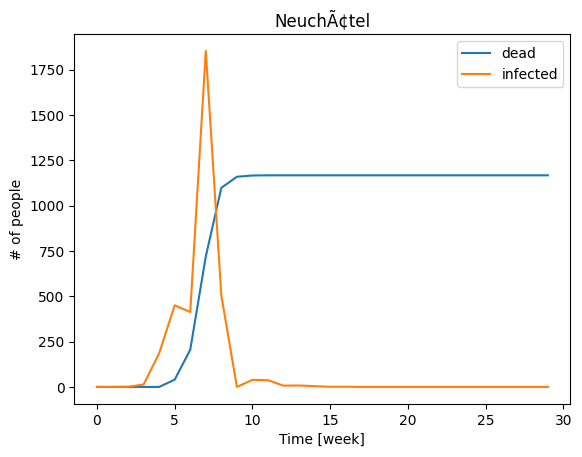

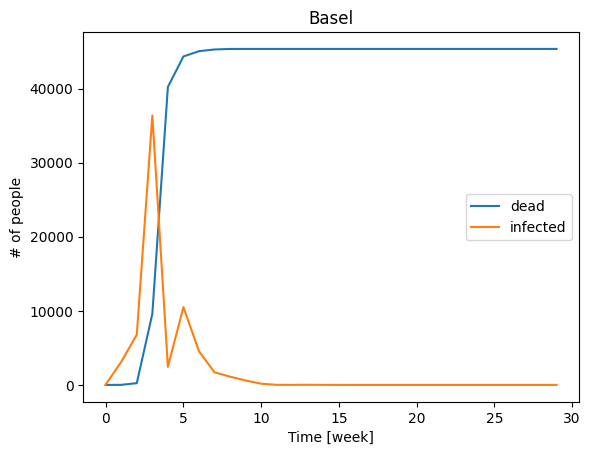

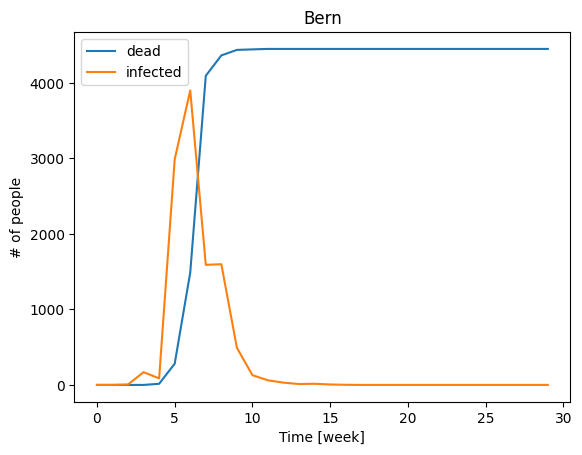

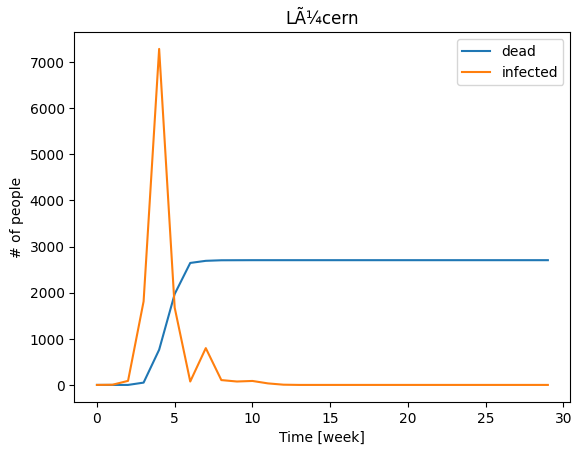

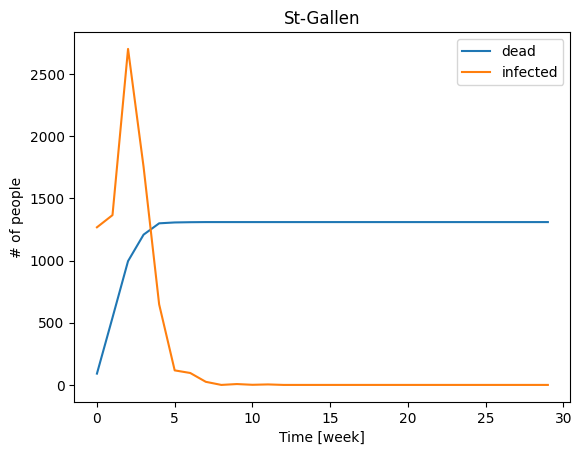

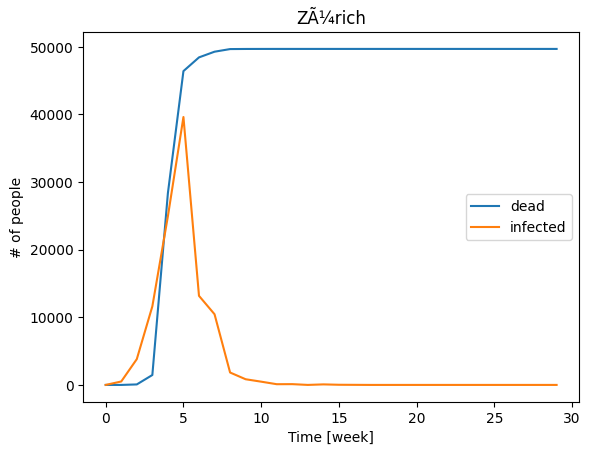

In [6]:
cities = [info.city for info in infos_list]
# take the first one to have the names
city_names = list(cities[0])

for name in city_names:
    params = [city[name] for city in cities]
    deads = [param.dead for param in params]
    infected = [param.infected for param in params]
    plt.plot(deads, label=f'dead')
    plt.plot(infected, label=f'infected')
    plt.xlabel('Time [week]')
    plt.ylabel('# of people')
    plt.title(name)
    plt.legend()
    plt.show()

### Discuss the evolution of the variables over time.
TODO

## Question 2 a)

In [7]:
class RussoPolicy(Agent):
    def __init__(self):
        self.total_infected = 0
        self.confined = False
        self.wi = 0
        self.confinment_start = -1
        self.confinment_end = -1

    def load_model(self, savepath: str):
        pass

    def optimize_model(self) -> float:
        pass

    def save_model(self, savepath: str):
        pass

    def reset(self):
        self.total_infected = 0
        self.confined = False
        self.wi = 0
        self.confinment_start = -1
        self.confinment_end = -1

    def act(self, obs, reward):
        self.total_infected += sum(obs.total.infected)
        self.wi += 1
        if self.confined:
            if self.wi >= self.confinment_start + 4:
                self.confinment_end = self.wi
                self.confined = False
            return {
                'confinement': True,
                'isolation': False,
                'hospital': False,
                'vaccinate': False,
            }
        if self.total_infected > 20000 and \
                self.confinment_end + 2 <= self.wi:
            self.confined = True
            self.confinment_start = self.wi
        return {
            'confinement': False,
            'isolation': False,
            'hospital': False,
            'vaccinate': False,
        }  #%% md

# Mini-project 1: Deep Q-learning for Epidemic Mitigation

## Imports

## Question 1

In [8]:
dyn = ModelDynamics('config/switzerland.yaml')
env = Env(dyn,  # We pass the dynamical model to the environment
          action_space=None,  # Here one could pass an openai gym action space that can then be sampled
          observation_space=None,  # Here one could pass an openai gym obs space that can then be sampled
          )
obs, info = env.reset(seed=0)
action = {  # DO NOTHING
    'confinement': False,
    'isolation': False,
    'hospital': False,
    'vaccinate': False,
}

In [9]:
infos_list = []
for i in range(30):
    obs, reward, done, info = env.step(action)
    infos_list.append(info)

### 1

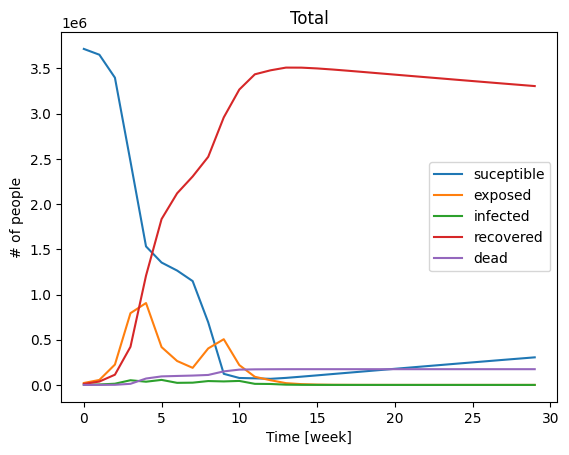

In [10]:
totals = [info.total for info in infos_list]
suceptibles = [total.suceptible for total in totals]
exposeds = [total.exposed for total in totals]
infected = [total.infected for total in totals]
recovereds = [total.recovered for total in totals]
deads = [total.dead for total in totals]

plt.plot(suceptibles, label='suceptible')
plt.plot(exposeds, label='exposed')
plt.plot(infected, label='infected')
plt.plot(recovereds, label='recovered')
plt.plot(deads, label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### 2

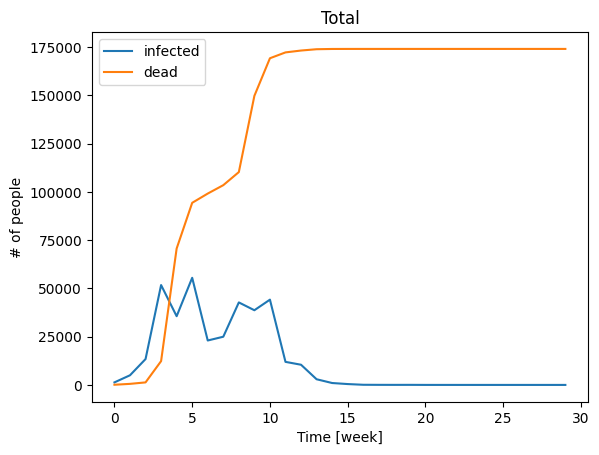

In [11]:
plt.plot(infected, label='infected')
plt.plot(deads, label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### 3

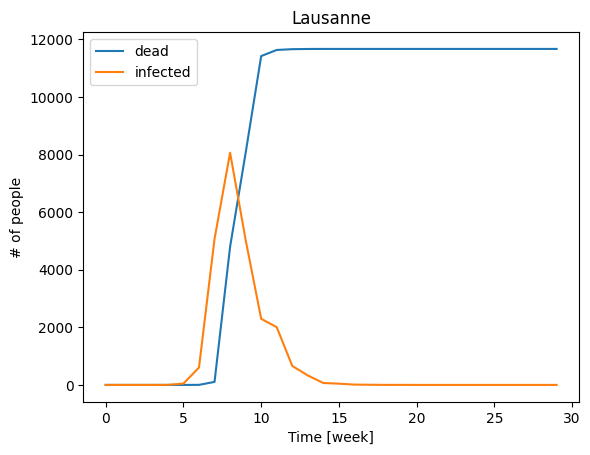

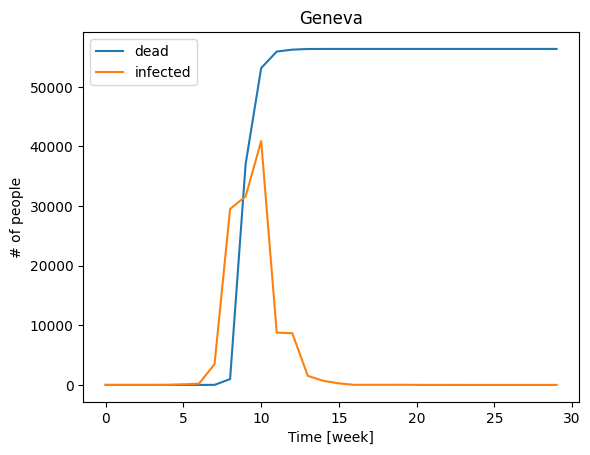

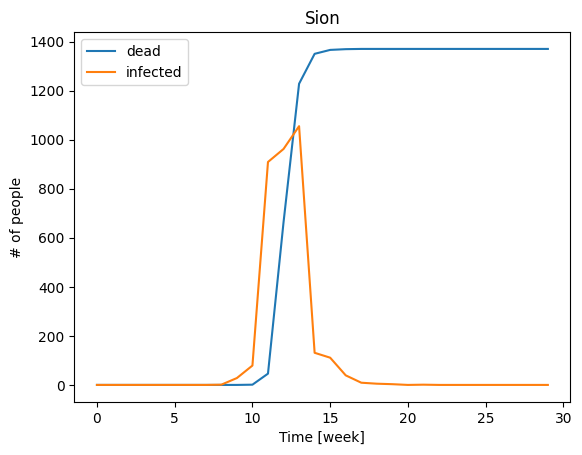

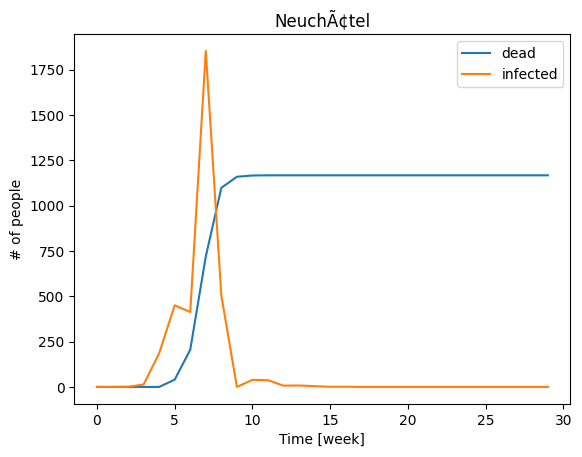

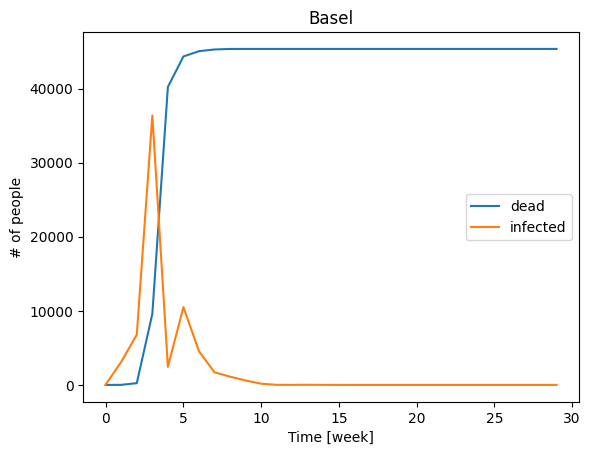

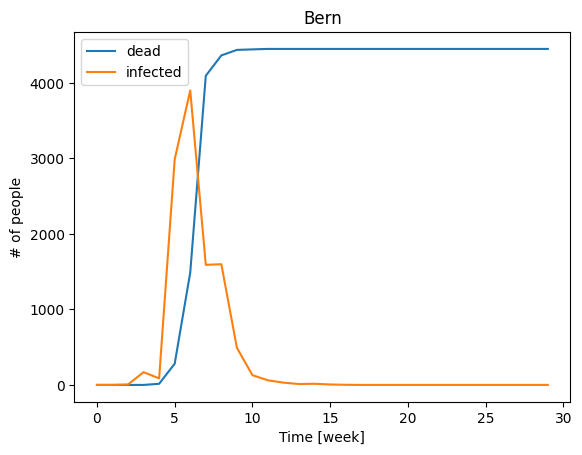

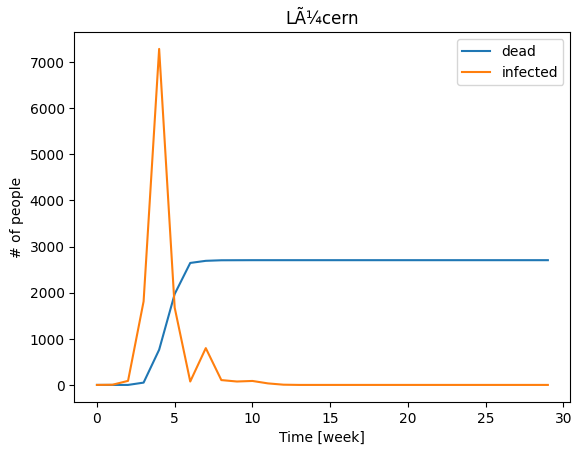

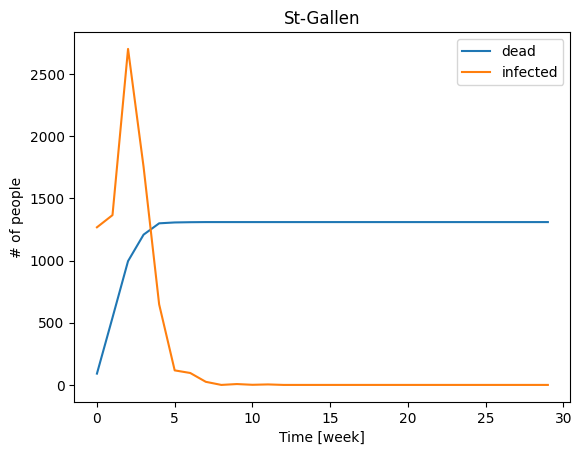

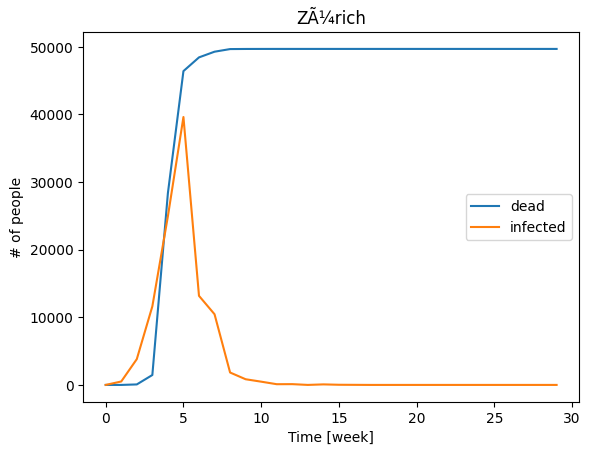

In [12]:
cities = [info.city for info in infos_list]
# take the first one to have the names
city_names = list(cities[0])

for name in city_names:
    params = [city[name] for city in cities]
    deads = [param.dead for param in params]
    infected = [param.infected for param in params]
    plt.plot(deads, label=f'dead')
    plt.plot(infected, label=f'infected')
    plt.xlabel('Time [week]')
    plt.ylabel('# of people')
    plt.title(name)
    plt.legend()
    plt.show()

### Discuss the evolution of the variables over time.
TODO

## Question 2 a)

In [13]:
class RussoPolicy(Agent):
    def __init__(self):
        self.total_infected = 0
        self.confined = False
        self.wi = 0
        self.confinment_start = -1
        self.confinment_end = -1

    def load_model(self, savepath: str):
        pass

    def optimize_model(self) -> float:
        pass

    def save_model(self, savepath: str):
        pass

    def reset(self):
        self.total_infected = 0
        self.confined = False
        self.wi = 0
        self.confinment_start = -1
        self.confinment_end = -1

    def act(self, obs, reward):
        self.total_infected += sum(obs.total.infected)
        self.wi += 1
        if self.confined:
            if self.wi >= self.confinment_start + 4:
                self.confinment_end = self.wi
                self.confined = False
            return {
                'confinement': True,
                'isolation': False,
                'hospital': False,
                'vaccinate': False,
            }
        if self.total_infected > 20000 and \
                self.confinment_end + 2 <= self.wi:
            self.confined = True
            self.confinment_start = self.wi
        return {
            'confinement': False,
            'isolation': False,
            'hospital': False,
            'vaccinate': False,
        }

In [14]:
dyn = ModelDynamics('config/switzerland.yaml')
env = Env(dyn,  # We pass the dynamical model to the environment
          action_space=None,  # Here one could pass an openai gym action space that can then be sampled
          observation_space=None,  # Here one could pass an openai gym obs space that can then be sampled
          )
obs, info = env.reset(seed=0)
action = None
infos_list = []
policy = RussoPolicy()
actions = []
reward = [[0]]
for i in range(30):
    action = policy.act(obs, reward[0][0])
    actions.append(action['confinement'])
    obs, reward, done, info = env.step(action)
    infos_list.append(info)

### 1

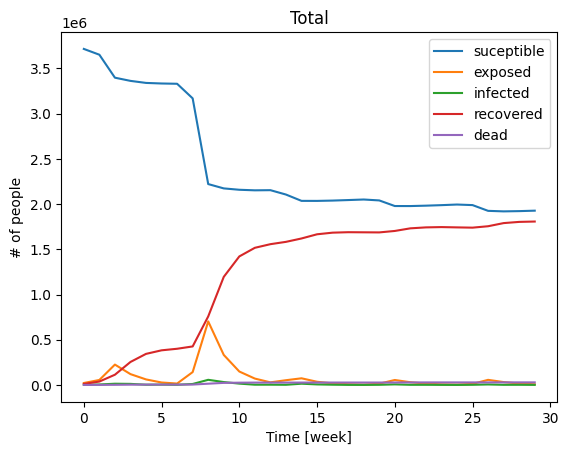

In [15]:
totals = [info.total for info in infos_list]
suceptibles = [total.suceptible for total in totals]
exposeds = [total.exposed for total in totals]
infected = [total.infected for total in totals]
recovereds = [total.recovered for total in totals]
deads = [total.dead for total in totals]

plt.plot(suceptibles, label='suceptible')
plt.plot(exposeds, label='exposed')
plt.plot(infected, label='infected')
plt.plot(recovereds, label='recovered')
plt.plot(deads, label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### 2

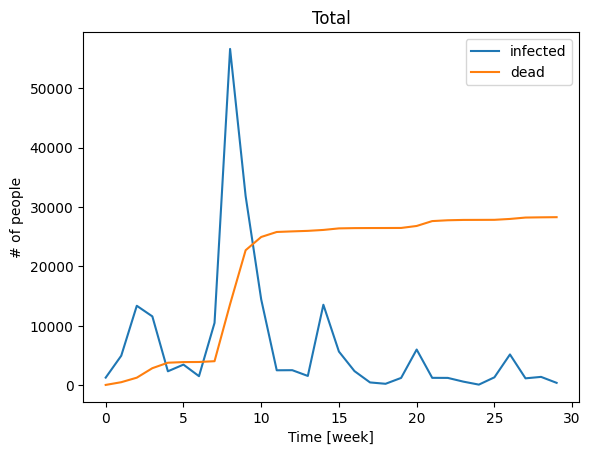

In [16]:
plt.plot(infected, label='infected')
plt.plot(deads, label='dead')
plt.xlabel('Time [week]')
plt.ylabel('# of people')
plt.title('Total')
plt.legend()
plt.show()

### 3

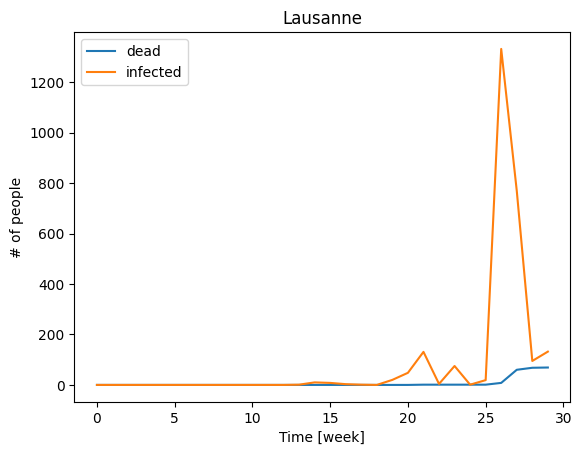

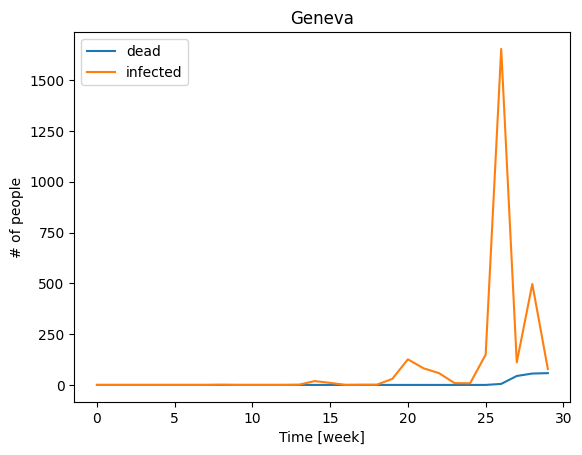

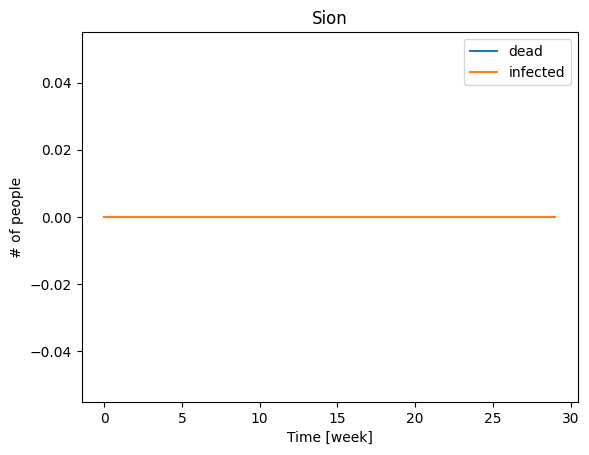

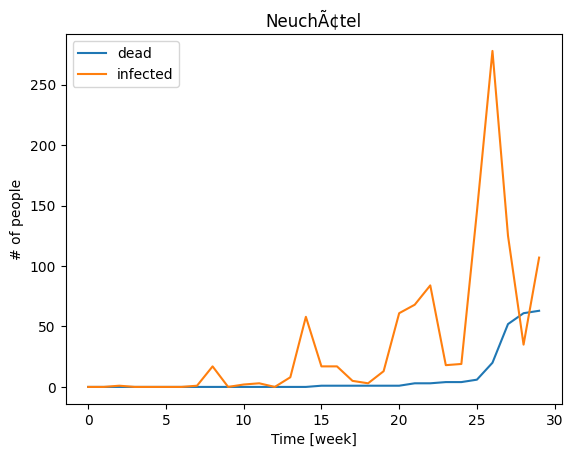

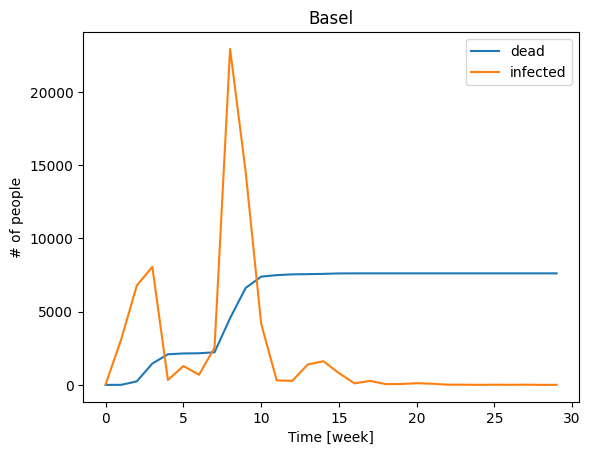

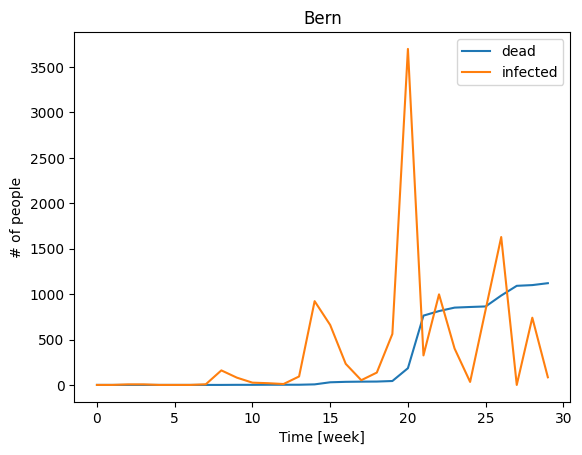

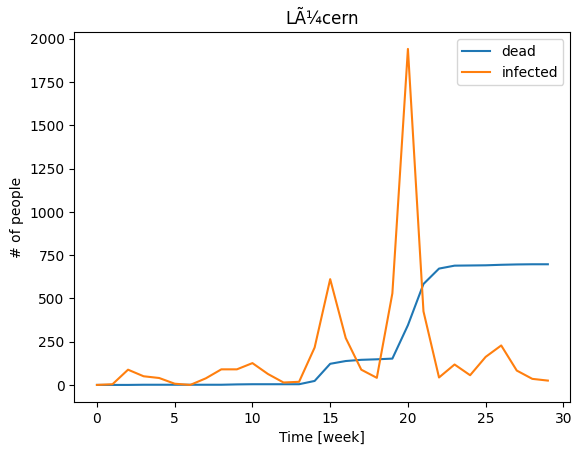

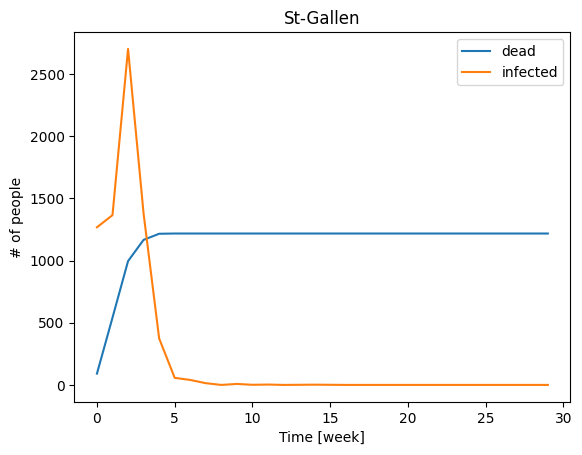

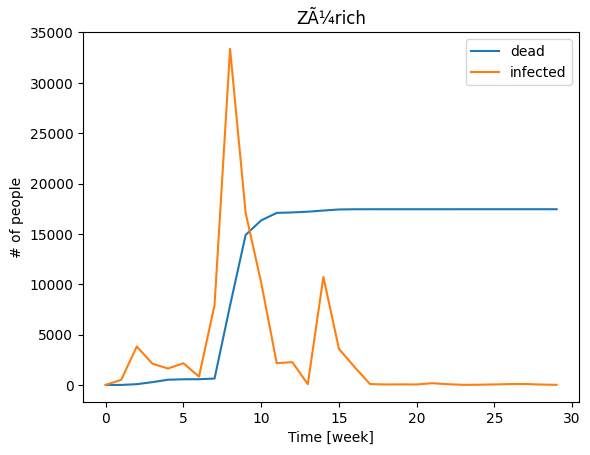

In [17]:
cities = [info.city for info in infos_list]
# take the first one to have the names
city_names = list(cities[0])

for name in city_names:
    params = [city[name] for city in cities]
    deads = [param.dead for param in params]
    infected = [param.infected for param in params]
    plt.plot(deads, label=f'dead')
    plt.plot(infected, label=f'infected')
    plt.xlabel('Time [week]')
    plt.ylabel('# of people')
    plt.title(name)
    plt.legend()
    plt.show()

### 4

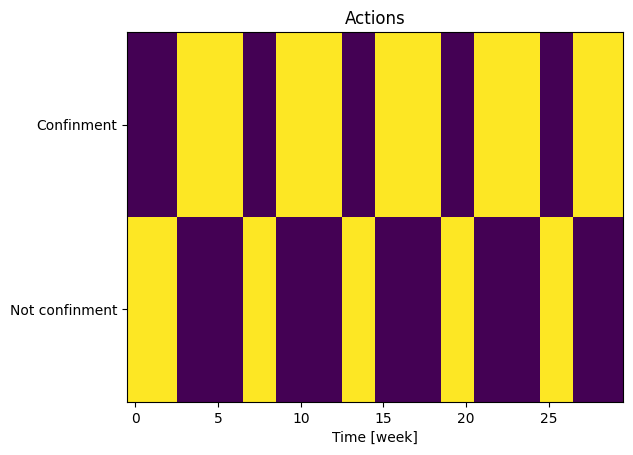

In [18]:
plt.imshow([actions, [not a for a in actions]], aspect='auto')
# y ticks label['Confinment', 'Not confinment']
plt.yticks([0, 1], ['Confinment', 'Not confinment'])
plt.xlabel('Time [week]')
plt.title('Actions')
plt.show()

## Question 2 b)

In [19]:
def run_episode(policy: Agent, env: Env, weeks: int = 30, seed: int = 0) -> (list, list, ...):
    # We pass a seed to the env to ensure reproductibility
    obs, info = env.reset(seed=seed)
    policy.reset()
    cumulative_reward = 0
    action_list, obs_list, reward_list = [], [], []
    reward = torch.tensor([[0]])
    for i in range(weeks):
        action = policy.act(obs, reward)
        obs, reward, done, info = env.step(action)
        cumulative_reward = reward + cumulative_reward
        action_list.append(action)
        obs_list.append(obs)
        reward_list.append(reward)
    return action_list, obs_list, cumulative_reward

In [20]:
def evaluate_policy(policy: Agent, env: Env, iterations: int = 50) -> (list, list, list):
    number_of_confined_days_list = []
    cumulative_reward_list = []
    number_of_total_deaths_list = []
    for i in range(iterations):
        # action_list, observation_list
        action_list, obs_list, cumulative_reward = run_episode(policy, env, weeks=30, seed=i)
        number_of_confined_days = np.sum([7 if action['confinement'] else 0 for action in action_list])
        number_of_deaths = np.sum([np.sum(obs.total.dead) for obs in obs_list])
        cumulative_reward_list.append(cumulative_reward)
        number_of_confined_days_list.append(number_of_confined_days)
        number_of_total_deaths_list.append(number_of_deaths)
    cumulative_reward_list = [tensor[0, 0] for tensor in cumulative_reward_list]
    return number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list

In [21]:
number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list = evaluate_policy(RussoPolicy(), env)

In [22]:
number_of_confined_days_array = np.array(number_of_confined_days_list, dtype=float).reshape((-1, 1))
cumulative_reward_array = np.array(cumulative_reward_list, dtype=float).reshape((-1, 1))
number_of_total_deaths_array = np.array(number_of_total_deaths_list, dtype=float).reshape((-1, 1))

In [23]:
def hist_avg(ax, data, title):
    ymax = 50
    if title == 'deaths':
        x_range = (1000, 200000)
    elif title == 'cumulative rewards':
        x_range = (-300, 300)
    elif 'days' in title:
        x_range = (0, 200)
    else:
        raise ValueError(f'{title} is not a valid title')
    ax.set_title(title)
    ax.set_ylim(0, ymax)
    ax.vlines([np.mean(data)], 0, ymax, color='red')
    ax.hist(data, bins=60, range=x_range)

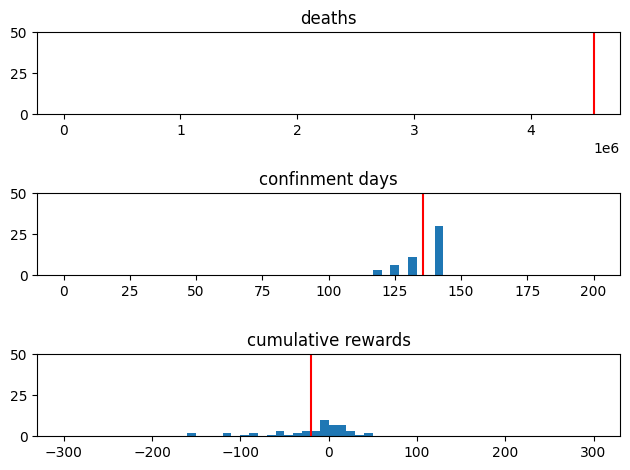

In [24]:
fig, ax = plt.subplots(3, 1)
hist_avg(ax[0], number_of_total_deaths_array, 'deaths')
hist_avg(ax[1], number_of_confined_days_array, 'confinment days')
hist_avg(ax[2], cumulative_reward_array, 'cumulative rewards')
fig.tight_layout()
plt.show()

In [25]:
# For each deep-learning policy that you train in this project we recommend that you use the following
# hyperparameters. If you wish so, you are free to test other values, but as searching through the hyperparameterspace can be quite a tedious experience we are giving you values that we know will allow the algorithm to converge
# to a good policy
def create_model(input_dim: int, output_dim: int):
    return nn.Sequential(
        nn.Linear(input_dim, 64),
        nn.ReLU(),
        nn.Linear(64, 32),
        nn.ReLU(),
        nn.Linear(32, 16),
        nn.ReLU(),
        nn.Linear(16, output_dim)
    )


update_episodes = 5  # target update rate : (fully) update the target network every 5 episodes
iterations = 500  # training length : train for 500 episodes
learning_rate = 5e-3  # learning rate : 5 · 10−3 (when the action-space is binary)
discount_factor = .9
buffer_size = 2e4
batch_size = 2048

## Question 3

In [26]:
# Note unless special measures are taken, the training of neural networks is non-deterministic in most deeplearning libraries. To ensure that your results are reproducible you will thus need to seed not only the environment but also your deep-learning library. Refer to the jupyter tutorial notebook for instructions.
torch.manual_seed(0)
torch.use_deterministic_algorithms(True)

In [27]:
def observation2tensor(obs):
    """
    Convert an Observation object to a torch tensor so it can be used to feed a nn
    """
    # 9 cities, 2 for dead/infected, 7=|city.dead| days per week
    # -> 2*7*9 sized vect
    return torch.tensor([x for city in obs.city.values() for x in city.dead + city.infected]).float()


observation2tensor(obs)

tensor([6.8000e+01, 6.8000e+01, 6.8000e+01, 6.8000e+01, 6.8000e+01, 6.8000e+01,
        6.9000e+01, 2.3200e+02, 2.2800e+02, 1.6200e+02, 0.0000e+00, 1.7200e+02,
        2.5400e+02, 1.3200e+02, 5.6000e+01, 5.6000e+01, 5.6000e+01, 5.7000e+01,
        5.7000e+01, 5.7000e+01, 5.8000e+01, 1.7800e+02, 4.6200e+02, 8.9000e+02,
        2.3700e+02, 2.8800e+02, 1.5300e+02, 7.8000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        6.2000e+01, 6.2000e+01, 6.2000e+01, 6.3000e+01, 6.3000e+01, 6.3000e+01,
        6.3000e+01, 7.5000e+01, 1.2700e+02, 1.0000e+02, 5.3000e+01, 3.6000e+01,
        9.0000e+00, 1.0700e+02, 7.6170e+03, 7.6170e+03, 7.6170e+03, 7.6170e+03,
        7.6170e+03, 7.6170e+03, 7.6170e+03, 3.0000e+00, 6.0000e+00, 5.0000e+00,
        8.0000e+00, 5.0000e+00, 8.0000e+00, 5.0000e+00, 1.1030e+03, 1.1060e+03,
        1.1120e+03, 1.1130e+03, 1.1170e+

### Question 3.a)

In [28]:
epsilon = .7

In [34]:
class AgentDQN(Agent):
    """
    Implemented by following this tutorial : https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html
    """

    def __init__(self, env, *args, **kwargs):
        self.buffer = []  # contains (states, actions, next_state, reward) tuples
        self.episode = 0
        self.last_obs = None
        in_dim, out_dim = 2 * 9 * 7, 2
        self.Q_network = create_model(in_dim, out_dim)
        self.Q_target_network = create_model(in_dim, out_dim)
        self.optimizer = torch.optim.AdamW(self.Q_network.parameters(), lr=learning_rate, amsgrad=True)

    def load_model(self, savepath: str):
        self.Q_network.load_state_dict(torch.load(savepath))

    def optimize_model(self) -> float:
        if len(self.buffer) < batch_size:
            return 0
        transitions = torch.randperm(len(self.buffer))[:batch_size]
        transitions = [self.buffer[i] for i in transitions]
        state_batch, action_batch, next_state_batch, reward_batch = zip(*transitions)
        state_batch, next_state_batch, reward_batch = map(torch.stack, (state_batch, next_state_batch, reward_batch))
        reward_batch = reward_batch.reshape((-1, 1))  # reshape to (batch_size, 1)

        # Compute Q(s_t, a) - the model computes Q(s_t), then we select the columns of actions taken.
        state_action_values = self.Q_network(state_batch)

        # Compute V(s_{t+1}) for all next states.
        with torch.no_grad():
            next_state_values = self.Q_target_network(next_state_batch)
        # Compute the expected Q values
        expected_state_action_values = (next_state_values * discount_factor) + reward_batch

        # Compute Huber loss
        criterion = nn.SmoothL1Loss()
        loss = criterion(state_action_values, expected_state_action_values)

        # Optimize the model
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # update the target network every update_episode steps
        if self.episode % update_episodes == 0:
            self.Q_target_network.load_state_dict(self.Q_network.state_dict())

        # do not do in place gradient clipping
        return loss.item()

    def save_model(self, savepath: str):
        torch.save(self.Q_network.state_dict(), savepath)

    def reset(self):
        self.last_obs = None
        self.episode = 0

    def act(self, obs, reward):
        # cast the observation
        obs = observation2tensor(obs)
        # get the next action
        # epsilon-greedy policy
        if torch.rand(1) < epsilon:
            action = torch.rand(2)
        else:
            with torch.no_grad():
                action = self.Q_network(obs)
        if self.last_obs is not None:
            # store the transition
            self.buffer.append((self.last_obs, action, obs, reward))
        if len(self.buffer) > buffer_size:
            self.buffer.pop(0)
        # store the last observation
        self.last_obs = obs
        # update the episode
        self.episode += 1
        # return next action
        return {
            'confinement': bool(np.argmax(action.numpy())),
            'isolation': False,
            'hospital': False,
            'vaccinate': False,
        }

In [35]:
def train(policy: Agent, env: Env):
    eval_trace, training_trace = [], []
    for i in range(iterations):
        # Run an episode.
        action_list, obs_list, cumulated_reward = run_episode(policy, env)
        # Log the cumuative reward to training trace
        training_trace.append(cumulated_reward)
        # run a training step :
        policy.optimize_model()
        if (i + 1) % 50 == 0:
            _, cumulated_reward_list, _ = evaluate_policy(policy, env, 20)
            # Compute the average cumulative reward over the 20 evaluation episodes and log it to eval trace.
            average_cumulated_reward = sum(cumulated_reward) / len(cumulated_reward_list)
            eval_trace.append(average_cumulated_reward)
            # save a checkpoint of the model
            ckpt = i // 50 + 1
            policy.save_model(f'checkpoints/checkpoint_{ckpt}.pt')
            print(f'Checkpoint {ckpt} : average cumulated reward = {average_cumulated_reward}')
    # plot the training trace and the eval trace. (We expect a plot of the reward
    # in y and the training episode in x both for the training trace and the eval trace).
    plt.plot(range(iterations), training_trace)
    plt.plot(range(0, iterations, 50), eval_trace)


In [ ]:
agentDQN1 = AgentDQN(env)
train(agentDQN1, env)

Checkpoint 1 : average cumulated reward = tensor([-10.9330])
Checkpoint 2 : average cumulated reward = tensor([-2.8042])
Checkpoint 3 : average cumulated reward = tensor([-1.3102])


### Question 3.b)

In [32]:
def train_decreasing_exploration(policy: Agent, env: Env):
    """
    redefine the train function to update epsilon at each iteration
    """
    global epsilon
    eps_backup = epsilon
    eps_0, eps_min = .7, .2
    eval_trace, training_trace = [], []
    for i in range(iterations):
        # update epsilon
        epsilon = max(eps_0 * (iterations - i) / iterations, eps_min)
        # Run an episode.
        action_list, obs_list, cumulated_reward = run_episode(policy, env)
        # Log the cumuative reward to training trace
        training_trace.append(cumulated_reward)
        # run a training step :
        policy.optimize_model()
        if (i + 1) % 50 == 0:
            _, cumulated_reward_list, _ = evaluate_policy(policy, env, 20)
            # Compute the average cumulative reward over the 20 evaluation episodes and log it to eval trace.
            average_cumulated_reward = sum(cumulated_reward) / len(cumulated_reward_list)
            eval_trace.append(average_cumulated_reward)
            # save a checkpoint of the model
            ckpt = i // 50 + 1
            policy.save_model(f'checkpoints/checkpoint_{ckpt}.pt')
            print(f'Checkpoint {ckpt} : average cumulated reward = {average_cumulated_reward}')

    epsilon = eps_backup
    # plot the training trace and the eval trace. (We expect a plot of the reward
    # in y and the training episode in x both for the training trace and the eval trace).
    plt.plot(range(iterations), training_trace)
    plt.plot(range(0, iterations, 50), eval_trace)

In [33]:
agentDQN2 = AgentDQN(env)
train_decreasing_exploration(agentDQN2, env)

Checkpoint 1 : average cumulated reward = tensor([-9.7820])
Checkpoint 2 : average cumulated reward = tensor([-9.5709])


KeyboardInterrupt: 

### Question 3.c)

In [ ]:
for agent in [agentDQN1, agentDQN2]:
    number_of_confined_days_list, cumulative_reward_list, number_of_total_deaths_list = evaluate_policy(agent, env)
    number_of_confined_days_array = np.array(number_of_confined_days_list, dtype=float).reshape((-1, 1))
    cumulative_reward_array = np.array(cumulative_reward_list, dtype=float).reshape((-1, 1))
    number_of_total_deaths_array = np.array(number_of_total_deaths_list, dtype=float).reshape((-1, 1))
    fig, ax = plt.subplots(3, 1)
    hist_avg(ax[0], number_of_total_deaths_array, 'deaths')
    hist_avg(ax[1], number_of_confined_days_array, 'confinment days')
    hist_avg(ax[2], cumulative_reward_array, 'cumulative rewards')
    fig.tight_layout()
    plt.show()